<a href="https://colab.research.google.com/github/taguka/atlas/blob/master/dhash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
!pip3 install https://download.pytorch.org/whl/cu80/torch-1.0.0-cp36-cp36m-linux_x86_64.whl
!pip install pretrainedmodels

In [0]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

In [0]:
!pip3 install kaggle
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)
!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json



!kaggle competitions download -c human-protein-atlas-image-classification
!unzip -qq train.zip -d train | awk 'BEGIN {ORS=" "} {if(NR%500==0) print "."}'
!unzip -qq test.zip -d test | awk 'BEGIN {ORS=" "} {if(NR%500==0) print "."}'
!rm test.zip
!rm train.zip

In [0]:
#!pip install dhash
import dhash
from PIL import Image
import os
import cv2
def read_files(folder, suffix='_red'):
    flag = cv2.IMREAD_GRAYSCALE
    inputs = []
    for root, _, files in os.walk(folder, topdown=False):
        for rel_filename in files:
          base, ext = os.path.splitext(rel_filename)
          if base.lower().endswith(suffix):
            abs_filename = os.path.join(root, rel_filename)
            hash = dhash.dhash_int(Image.open(abs_filename),size=16)
            inputs.append((abs_filename,hash))
    return inputs

In [0]:
input_red=read_files('train/')

In [0]:
distances_red=[]
cnt=0
for i,  outer_cur in enumerate(input_red[:-1]):
  for (inner_cur) in input_red[(i+1):]:
    cnt+=1
    if cnt%10000000==0:
      print(cnt)
    diff=dhash.get_num_bits_different(outer_cur[1],inner_cur[1])
    if diff<26: #5% from 512 bit
      distances_red.append([outer_cur[0],inner_cur[0],diff])

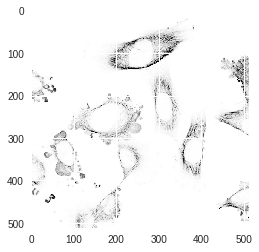

In [7]:
from pylab import imread,subplot,imshow,show
image = plt.imread('train/6dc893d4-bbac-11e8-b2ba-ac1f6b6435d0_red.png')   
plt.imshow(image)

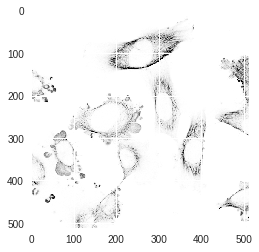

In [8]:
image = plt.imread('train/d9a856ae-bbbe-11e8-b2ba-ac1f6b6435d0_red.png')   
plt.imshow(image)

In [22]:
distances_red

[['train/6dc893d4-bbac-11e8-b2ba-ac1f6b6435d0_red.png',
  'train/d9a856ae-bbbe-11e8-b2ba-ac1f6b6435d0_red.png',
  0],
 ['train/a852a188-bbb2-11e8-b2ba-ac1f6b6435d0_red.png',
  'train/3202385a-bbca-11e8-b2bc-ac1f6b6435d0_red.png',
  15],
 ['train/6510cfb0-bba5-11e8-b2ba-ac1f6b6435d0_red.png',
  'train/4b650e3c-bba0-11e8-b2b9-ac1f6b6435d0_red.png',
  4],
 ['train/81cea69c-bb9e-11e8-b2b9-ac1f6b6435d0_red.png',
  'train/fa7c93b8-bba0-11e8-b2b9-ac1f6b6435d0_red.png',
  11],
 ['train/81cea69c-bb9e-11e8-b2b9-ac1f6b6435d0_red.png',
  'train/5dc2623a-bbb6-11e8-b2ba-ac1f6b6435d0_red.png',
  6],
 ['train/f46bceb2-bbb4-11e8-b2ba-ac1f6b6435d0_red.png',
  'train/90095b92-bba0-11e8-b2b9-ac1f6b6435d0_red.png',
  11],
 ['train/1190171e-bbab-11e8-b2ba-ac1f6b6435d0_red.png',
  'train/3fdab0ee-bbc8-11e8-b2bc-ac1f6b6435d0_red.png',
  4],
 ['train/bce7320c-bba9-11e8-b2ba-ac1f6b6435d0_red.png',
  'train/fb764be4-bbbc-11e8-b2ba-ac1f6b6435d0_red.png',
  12],
 ['train/fca003a0-bbaa-11e8-b2ba-ac1f6b6435d0_red.pn